# Доставка Еды: анализ

<img src='https://avatars.mds.yandex.net/get-altay/4667561/2a00000179894ed9fa6c51c04a69bdcfb562/XXXL'>

# Описание

Доставку еды осуществляет сервис заказа из ресторанов и продуктов из магазинов через мобильные приложения или веб-сайт. Доставку осуществляют курьерские службы, курьеры-партнёры сервиса, водители-партнёры и собственные курьеры ресторанов. На выбор доступны пиццерии, пекарни, рестораны грузинской и японской кухни, бургерные, стейк-хаусы, а также продуктовые магазины. 

В наборе данных информация о заказах по Москве одного агрегатора, которая оказалсь в открытом доступе

## Оглавление
### 1. Открытие файлов и изучение
### 2. Предобработка данных
### 3.  Исследовательский анализ данных
        Регионы России
        Девочки/Мальчики
        Лучшие спортсмены
        Особенности
### 4. Общий вывод
    

# Открытие файлов и изучение

Импортруем библиотеки и устанавлием параметры, которые будем использовать.

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
plt.rcParams["figure.figsize"] = (30,30)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_colwidth', None)

Открываем .csv файл и исследуем структуру.

In [66]:
df = pd.read_csv("moscow1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  500000 non-null  int64  
 1   first_name          499811 non-null  object 
 2   full_name           220136 non-null  object 
 3   email               216589 non-null  object 
 4   phone_number        500000 non-null  int64  
 5   address_city        500000 non-null  object 
 6   address_street      495541 non-null  object 
 7   address_house       498939 non-null  object 
 8   address_entrance    286148 non-null  object 
 9   address_floor       287690 non-null  float64
 10  address_office      277509 non-null  object 
 11  address_comment     150078 non-null  object 
 12  location_latitude   500000 non-null  float64
 13  location_longitude  500000 non-null  float64
 14  amount_charged      500000 non-null  int64  
 15  user_id             500000 non-nul

In [67]:
df.nunique()

id                    500000
first_name            105328
full_name             127601
email                 136063
phone_number          340921
address_city            1599
address_street          5908
address_house          10842
address_entrance        2664
address_floor            217
address_office          5398
address_comment       125197
location_latitude     149063
location_longitude    154146
amount_charged          7285
user_id               347665
user_agent             41119
created_at            163502
address_doorcode       94558
dtype: int64

Уберем возможные персональные данные.

In [68]:
df.drop(columns=['id', 'full_name', 'email', 'phone_number', 'address_city', 'address_street', 'address_house', 'address_entrance', 
                 'address_floor', 'address_office', 'address_doorcode'], inplace = True)

In [69]:
df.sample(5)

,first_name,address_comment,location_latitude,location_longitude,amount_charged,user_id,user_agent,created_at
463138,Александр,NaN,55.738231,37.541287,791,11788084,ios(5.29.0),2/2/2022 13:36
119962,Дарина Д.,NaN,55.672016,37.665174,1888,190186056,ios(5.27.2),12/27/2021 10:26
367063,Николай,NaN,55.566598,37.485619,2468,400081,android (2.63.0),1/9/2022 19:17
5949,Надежда,"Практика ,позвонить как будете на месте",55.767762,37.606909,467,5149329,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_7_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) YandexEatsKit/1.24.0 EatsApp_iOS/5.21.0",9/29/2021 0:23
483035,Станислав,При вызове в домофон немного подождать. Долгий прозвон,55.737436,37.689969,853,254312344,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_7_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-taxi/650.12.0.165399 YandexEatsKit/1.26.0 Superapp/Eats",10/20/2021 22:47


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_name          499811 non-null  object 
 1   address_comment     150078 non-null  object 
 2   location_latitude   500000 non-null  float64
 3   location_longitude  500000 non-null  float64
 4   amount_charged      500000 non-null  int64  
 5   user_id             500000 non-null  int64  
 6   user_agent          500000 non-null  object 
 7   created_at          500000 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 30.5+ MB


In [71]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

first_name - 0%
address_comment - 70%
location_latitude - 0%
location_longitude - 0%
amount_charged - 0%
user_id - 0%
user_agent - 0%
created_at - 0%


<AxesSubplot:>

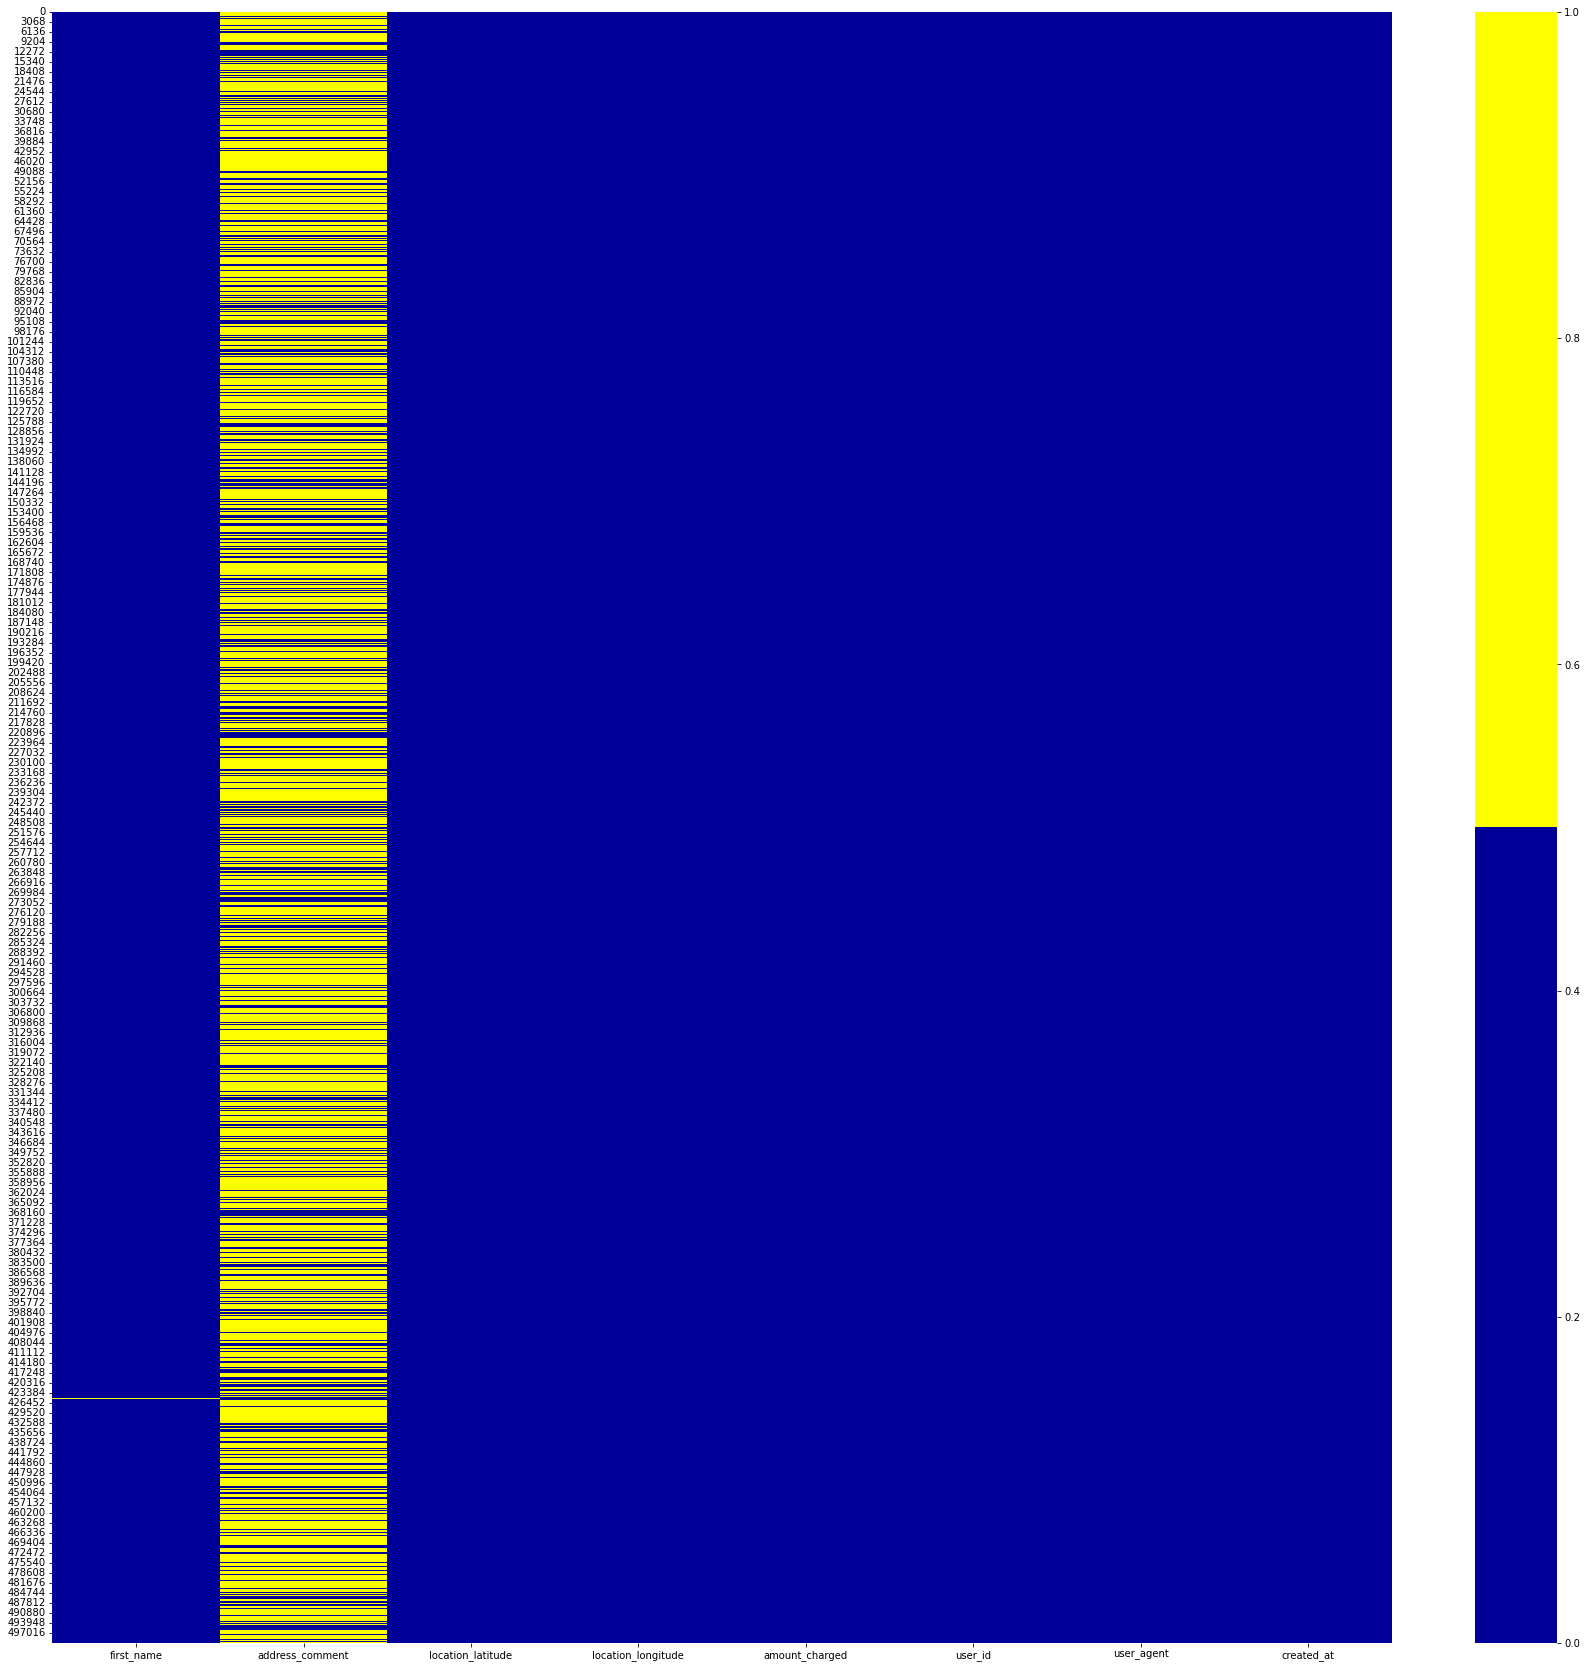

In [72]:
cols = df.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [73]:
df.duplicated().sum()

0

## Вывод

Таблица содержит 500000 строк и 8 колонок, в большинстве которых все данные присутствуют. Неполный столбец `address_comment`, но его можно заполнять опционально и это не влияет на анализ. Дубликатов нет.

# Предобработка данных

Задача стоит сделать базу данных удобнее: переименовать столбцы, изменить индекс и тип данных у даты, немного сгруппировать координаты

In [74]:
df.rename(columns = {'amount_charged':'Цена', 
                     'created_at':'Дата',
                    'user_id':'id заказчика'}, inplace=True)
df

,first_name,address_comment,location_latitude,location_longitude,Цена,id заказчика,user_agent,Дата
0,Марина,NaN,55.817654,37.829648,1359,323129982,MagnitApp_Android/2.0.8,12/25/2021 22:00
1,Sergey B.,NaN,55.816030,37.808985,0,297849704,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_7_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.2 Mobile/15E148 Safari/604.1",9/30/2021 20:09
2,Елизавета,NaN,56.073574,37.365298,934,263040570,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-lavka/1.3.0.143889 YandexEatsKit/1.17.26 Lavka/Standalone",6/30/2021 20:43
3,Жанна Мкртчян,NaN,55.685777,37.544971,1104,304379733,ios(5.22.0),10/24/2021 15:35
4,Яна,"1573# код для входа во двор пешком, оставить заказ на крючке справа от двери (под звонком)",55.736684,37.687120,485,50560339,"Mozilla/5.0 (Linux; Android 10; M2010J19CG Build/QKQ1.200830.002; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/89.0.4389.86 Mobile Safari/537.36 yandex-taxi/4.26.0.121851 Android/10 (Xiaomi; M2010J19CG) Superapp/Eats EatsKit/1.25.0",7/11/2021 10:39
...,...,...,...,...,...,...,...,...
499995,Сергей,NaN,55.818918,37.658652,383,19509504,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-lavka/1.3.0.143889 YandexEatsKit/1.17.26 Lavka/Standalone",7/5/2021 16:26
499996,Ivana,NaN,55.754508,37.605674,1999,23487800,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_4_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-taxi/600.33.1.129129 YandexEatsKit/1.17.28 Superapp/Eats",6/21/2021 16:40
499997,Ivana,NaN,55.754444,37.606268,1659,23487800,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_4_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-taxi/600.33.1.129129 YandexEatsKit/1.17.28 Superapp/Eats",6/29/2021 23:34
499998,Ivana,NaN,55.756741,37.605337,979,23487800,"Mozilla/5.0 (iPhone; CPU iPhone OS 15_0_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-taxi/650.14.2.169973 YandexEatsKit/1.26.0 Superapp/Eats",11/2/2021 15:31


In [75]:
df['location_latitude'] = df['location_latitude'].round(4)
df['location_longitude'] = df['location_longitude'].round(4)

In [76]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [77]:
df.set_index('id заказчика',  inplace = True)
#df = df.reindex(columns=(['Дата'] +  list([a for a in df.columns if a !=  'Дата'] )))

In [78]:
df = df[['first_name',
         'Дата',
         'Цена',
         'location_latitude',
         'location_longitude',
         'address_comment',
         'user_agent']]

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 323129982 to 307475568
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   first_name          499811 non-null  object        
 1   Дата                500000 non-null  datetime64[ns]
 2   Цена                500000 non-null  int64         
 3   location_latitude   500000 non-null  float64       
 4   location_longitude  500000 non-null  float64       
 5   address_comment     150078 non-null  object        
 6   user_agent          500000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 30.5+ MB


### Вывод

В итоге получилась фукциональная таблица, с которой можно удобно работать. Пояснения и очередность такие:
* `index` - уникальное id заказчика;
* `first_name ` - имя заказчика;
* `Дата` - дата заказа;
* `Цена` - стоимость заказа;
* `location_latitude` - координата широты адреса заказа;
* `location_longitude` - координата долготы адреса заказа;
* `address_comment` - комментарий курьеру или ресторану;
* `user_agent` - устройство с которого был сделан заказ.

# Исследовательский анализ данных

Нам предстоит рассмотреть и ответить на вопросы, связанные с ценой, как она меняется от времени заказа, от пола заказчика, от устройства, какие места Москвы лидирует по количеству заказов, какой процент отмены заказов.

## Цена

Первое самое интересное это цена заказа.

In [80]:
df.sort_values(by = ['Цена'], ascending = False)

,first_name,Дата,Цена,location_latitude,location_longitude,address_comment,user_agent
id заказчика,,,,,,,
477429,лев,2021-11-06 13:47:00,65929,55.7364,37.5990,NaN,ios(5.23.1)
293469517,Иосиф,2021-11-06 21:58:00,50349,55.7587,37.6404,NaN,"Mozilla/5.0 (Linux; Android 11; SM-A715F Build/RP1A.200720.012; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/95.0.4638.74 Mobile Safari/537.36 yandex-taxi/4.59.0.122125 Android/11 (samsung; SM-A715F) Superapp/Eats EatsKit/3.5.0"
21806664,Элла,2021-09-12 16:21:00,49990,55.8964,37.5211,"Склад «Деловые линии», ориентир ворота 11",ios(5.19.1)
293469517,Иосиф,2021-11-05 21:03:00,49224,55.7751,37.5500,Звонить +79952623110 !!!,"Mozilla/5.0 (iPad; CPU OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-taxi/650.14.2.169973 YandexEatsKit/1.26.0 Superapp/Eats"
293469517,Иосиф,2021-10-29 17:13:00,45939,55.7471,37.5834,+79952623110 - номер для связи,"Mozilla/5.0 (iPad; CPU OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-taxi/650.14.2.169973 YandexEatsKit/1.26.0 Superapp/Eats"
...,...,...,...,...,...,...,...
313927183,Игорь Цой,2021-11-25 13:19:00,0,55.8104,37.5937,NaN,android (2.60.1)
6593751,константин,2021-06-30 20:29:00,0,55.8606,37.5929,NaN,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-lavka/1.3.0.143889 YandexEatsKit/1.17.26 Lavka/Standalone"
1894879,Роман Арюков,2021-12-12 02:24:00,0,55.7829,37.5804,NaN,ios(5.27.0)


Отсортируем данные по убываю и видим, что максимальная стоимость заказа была 65929 рублей. Но также замечаем много 0 в стоимости.

<AxesSubplot:ylabel='None'>

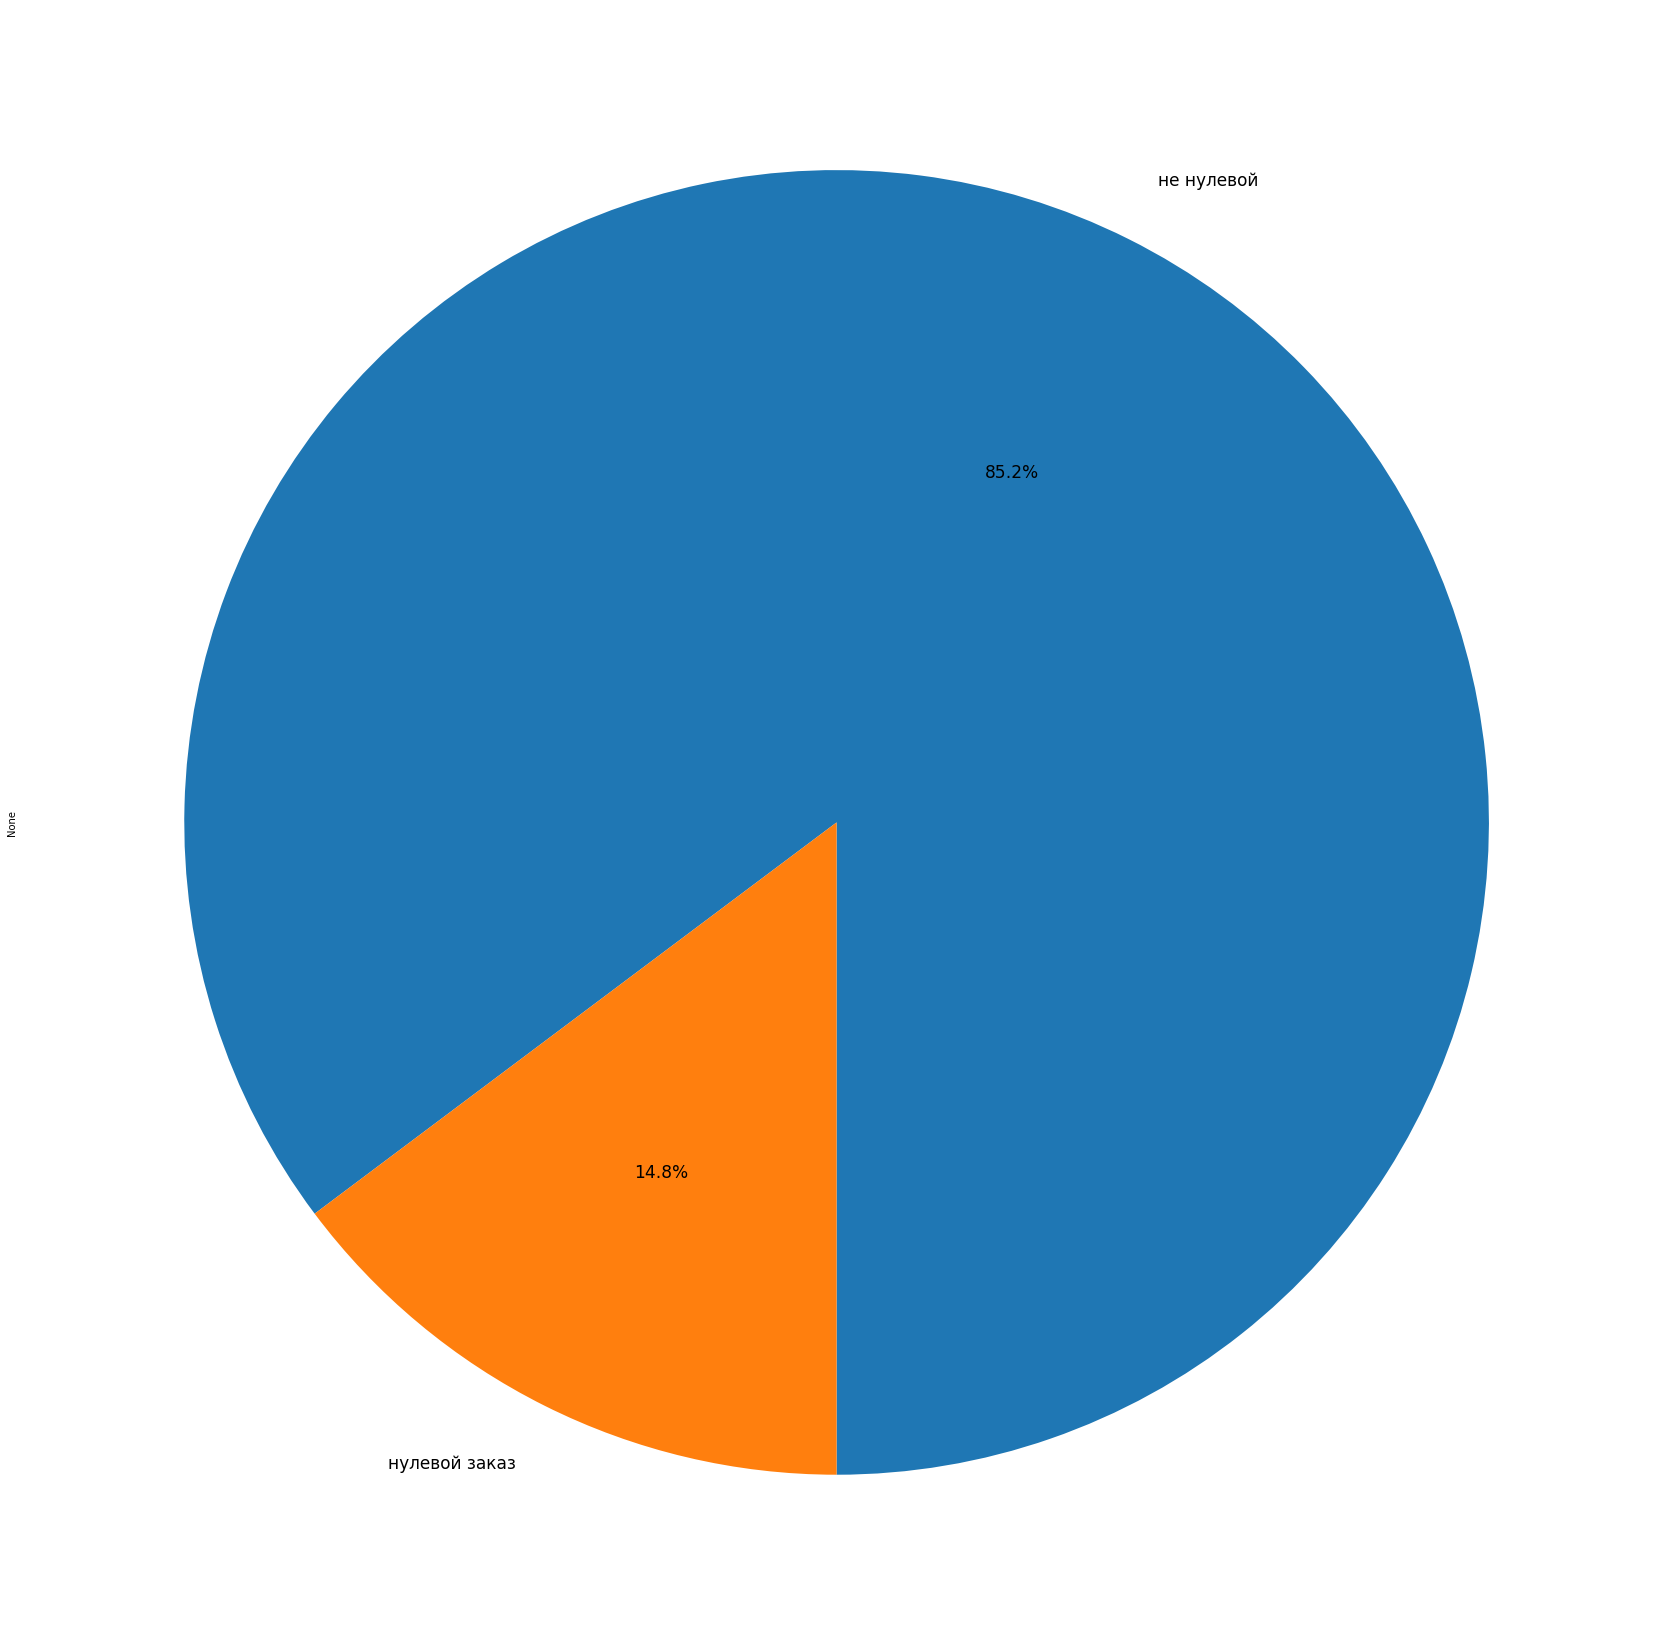

In [81]:
pd.Series(np.where(df['Цена']==0,'нулевой заказ','не нулевой')).value_counts().plot.pie(autopct='%1.1f%%', startangle=270, fontsize=17)

Почти 15% заказов стоит 0. Что это значит? Либо эти заказы были отменены, либо за них заплатили наличными. Но давайте выясним. 

In [82]:
pd.pivot_table(df[df['Цена'] == 0], values = 'Цена',
               index = 'id заказчика',
               aggfunc=(len,sum, 'mean')).sort_values(by = ['len'])

,len,mean,sum
id заказчика,,,
141,1,0.0,0
256260959,1,0.0,0
256268574,1,0.0,0
256271049,1,0.0,0
256272579,1,0.0,0
...,...,...,...
183899923,15,0.0,0
68944630,19,0.0,0
294986146,19,0.0,0


In [83]:
df.loc[{84846150,294986146}]

C:\Users\MAx\AppData\Local\Temp\ipykernel_11604\2549881158.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df.loc[{84846150,294986146}]


,first_name,Дата,Цена,location_latitude,location_longitude,address_comment,user_agent
id заказчика,,,,,,,
294986146,Екатерина Утюпина,2021-11-23 14:51:00,0,55.7956,37.5411,"ТЕСТОВЫЙ ЗАКАЗ, НЕ ГОТОВИТЬ И НЕ ПРОБИВАТЬ, ЗАКАЗ ПОЗЖЕ БУДЕТ ОТМЕНЕН","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.85 YaBrowser/21.11.0.1996 Yowser/2.5 Safari/537.36"
294986146,Екатерина Утюпина,2021-12-23 15:28:00,0,55.5807,37.6517,"ТЕСТОВЫЙ ЗАКАЗ, НЕ ГОТОВИТЬ И НЕ ПРОБИВАТЬ, ЗАКАЗ ПОЗЖЕ БУДЕТ ОТМЕНЕН","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.85 YaBrowser/21.11.3.927 Yowser/2.5 Safari/537.36"
294986146,Екатерина Утюпина,2021-11-29 14:10:00,0,55.6459,37.5265,"ТЕСТОВЫЙ ЗАКАЗ, НЕ ГОТОВИТЬ И НЕ ПРОБИВАТЬ, ЗАКАЗ ПОЗЖЕ БУДЕТ ОТМЕНЕН","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.85 YaBrowser/21.11.1.932 Yowser/2.5 Safari/537.36"
294986146,Екатерина Утюпина,2021-12-29 15:36:00,0,55.6287,37.7407,"ТЕСТОВЫЙ ЗАКАЗ, НЕ ГОТОВИТЬ И НЕ ПРОБИВАТЬ, ЗАКАЗ ПОЗЖЕ БУДЕТ ОТМЕНЕН","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.85 YaBrowser/21.11.4.727 Yowser/2.5 Safari/537.36"
294986146,Екатерина Утюпина,2021-11-03 20:19:00,0,55.7101,37.6546,"ТЕСТОВЫЙ ЗАКАЗ, НЕ ГОТОВИТЬ И НЕ ПРОБИВАТЬ, ЗАКАЗ ПОЗЖЕ БУДЕТ ОТМЕНЕН","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 YaBrowser/21.9.2.169 Yowser/2.5 Safari/537.36"
294986146,Екатерина Утюпина,2021-11-23 18:25:00,0,55.7584,37.5492,"ТЕСТОВЫЙ ЗАКАЗ, НЕ ГОТОВИТЬ И НЕ ПРОБИВАТЬ, ЗАКАЗ ПОЗЖЕ БУДЕТ ОТМЕНЕН","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.85 YaBrowser/21.11.0.1996 Yowser/2.5 Safari/537.36"
294986146,Екатерина Утюпина,2021-11-04 14:39:00,0,55.7574,37.6337,"ТЕСТОВЫЙ ЗАКАЗ, НЕ ГОТОВИТЬ И НЕ ПРОБИВАТЬ, ЗАКАЗ ПОЗЖЕ БУДЕТ ОТМЕНЕН","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 YaBrowser/21.9.2.169 Yowser/2.5 Safari/537.36"
294986146,Екатерина Утюпина,2021-10-05 19:54:00,0,55.6843,37.5501,"ТЕСТОВЫЙ ЗАКАЗ, НЕ ГОТОВИТЬ И НЕ ПРОБИВАТЬ, ЗАКАЗ ПОЗЖЕ БУДЕТ ОТМЕНЕН","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 YaBrowser/21.8.3.614 Yowser/2.5 Safari/537.36"
294986146,Екатерина Утюпина,2021-10-19 15:56:00,0,55.8239,37.4972,"ТЕСТОВЫЙ ЗАКАЗ, НЕ ГОТОВИТЬ И НЕ ПРОБИВАТЬ, ЗАКАЗ ПОЗЖЕ БУДЕТ ОТМЕНЕН","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 YaBrowser/21.9.0.1044 Yowser/2.5 Safari/537.36"


Объединив id заказчиков и посмотрев на комментарии нулевых заказов понимаем, что 0 означает отмененные заказы, деньги за которые не списываются.  

In [84]:
df_copy = df.copy()
df = df[df['Цена'] !=0]

Теперь, когда мы убрали отмененные заказы, давайте взглянем на какую в среднем цену заказывают еды.

<AxesSubplot:>

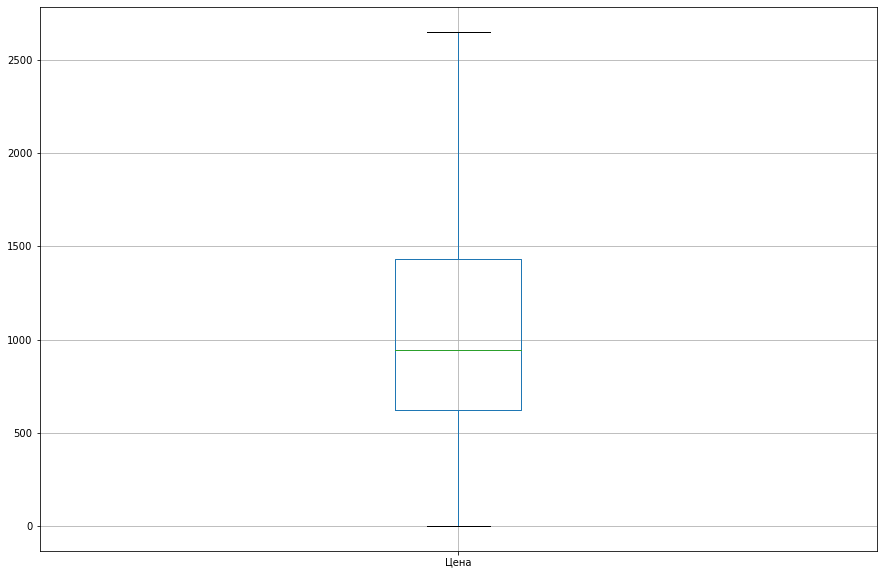

In [85]:
df.boxplot(column=['Цена'], figsize=(15, 10), showfliers=False)

In [86]:
df['Цена'].describe()

count    426194.000000
mean       1180.099258
std        1008.691024
min           1.000000
25%         622.000000
50%         944.000000
75%        1433.000000
max       65929.000000
Name: Цена, dtype: float64

Средний чек равен 944 рублям, медиана - 1180 руб.

<AxesSubplot:>

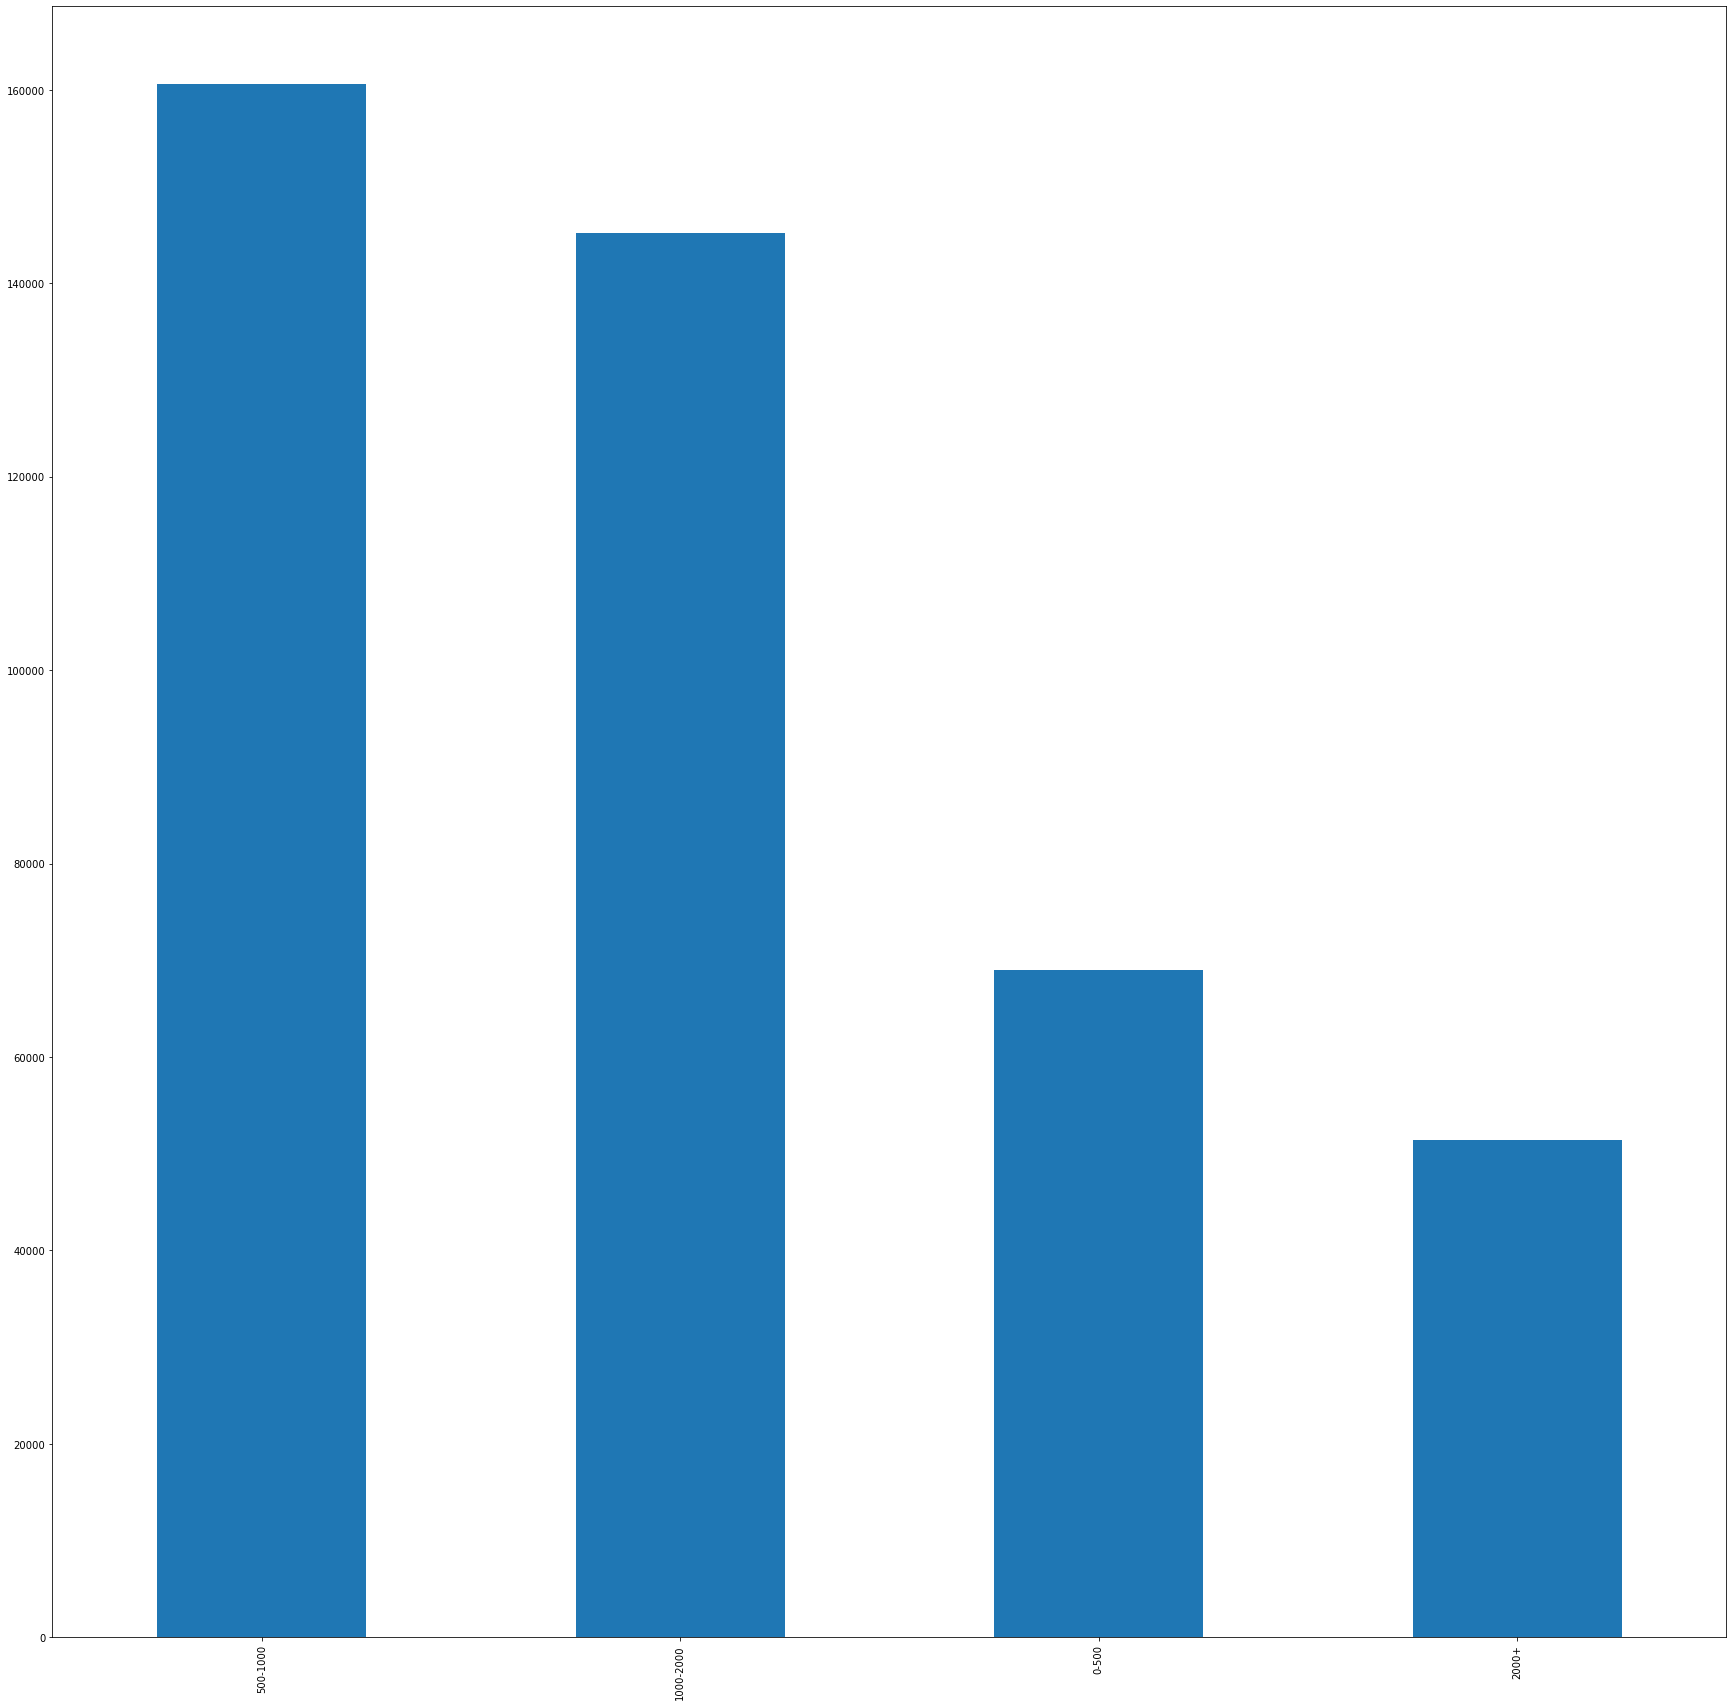

In [87]:
cut_labels_4 = ['0-500', '500-1000', '1000-2000', '2000+']
cut_bins = [0, 500, 1000, 2000, 200000]
df['Цена1'] = pd.cut(df['Цена'],
                       bins=cut_bins,
                       labels=cut_labels_4)
df['Цена1'].value_counts().plot(kind = "bar")


Если смотреть упрощенно, разбив на ценовые категории, то  наибольшее количество заказов делается в промежутках 500-1000 и 1000-2000 рублей.

<AxesSubplot:>

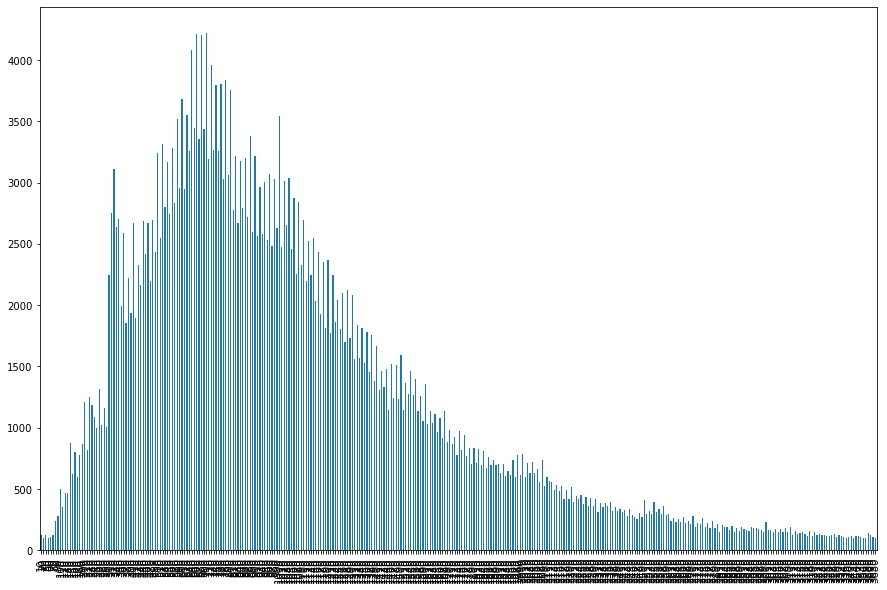

In [88]:
df['Цена'].round(-1).value_counts().sort_index(ascending=True)[df['Цена'].round(-1).value_counts() > 100].plot(kind = 'bar', figsize=(15, 10))

На гистограмме округленной до десятков видим, что
* происходит резкий рост заказов от 300р, вероятно минимальной цены заказа и последующее падение
* существует локальный пик в 1000р
* горка где *500
* Цена постепенно спадает


<AxesSubplot:xlabel='Дата'>

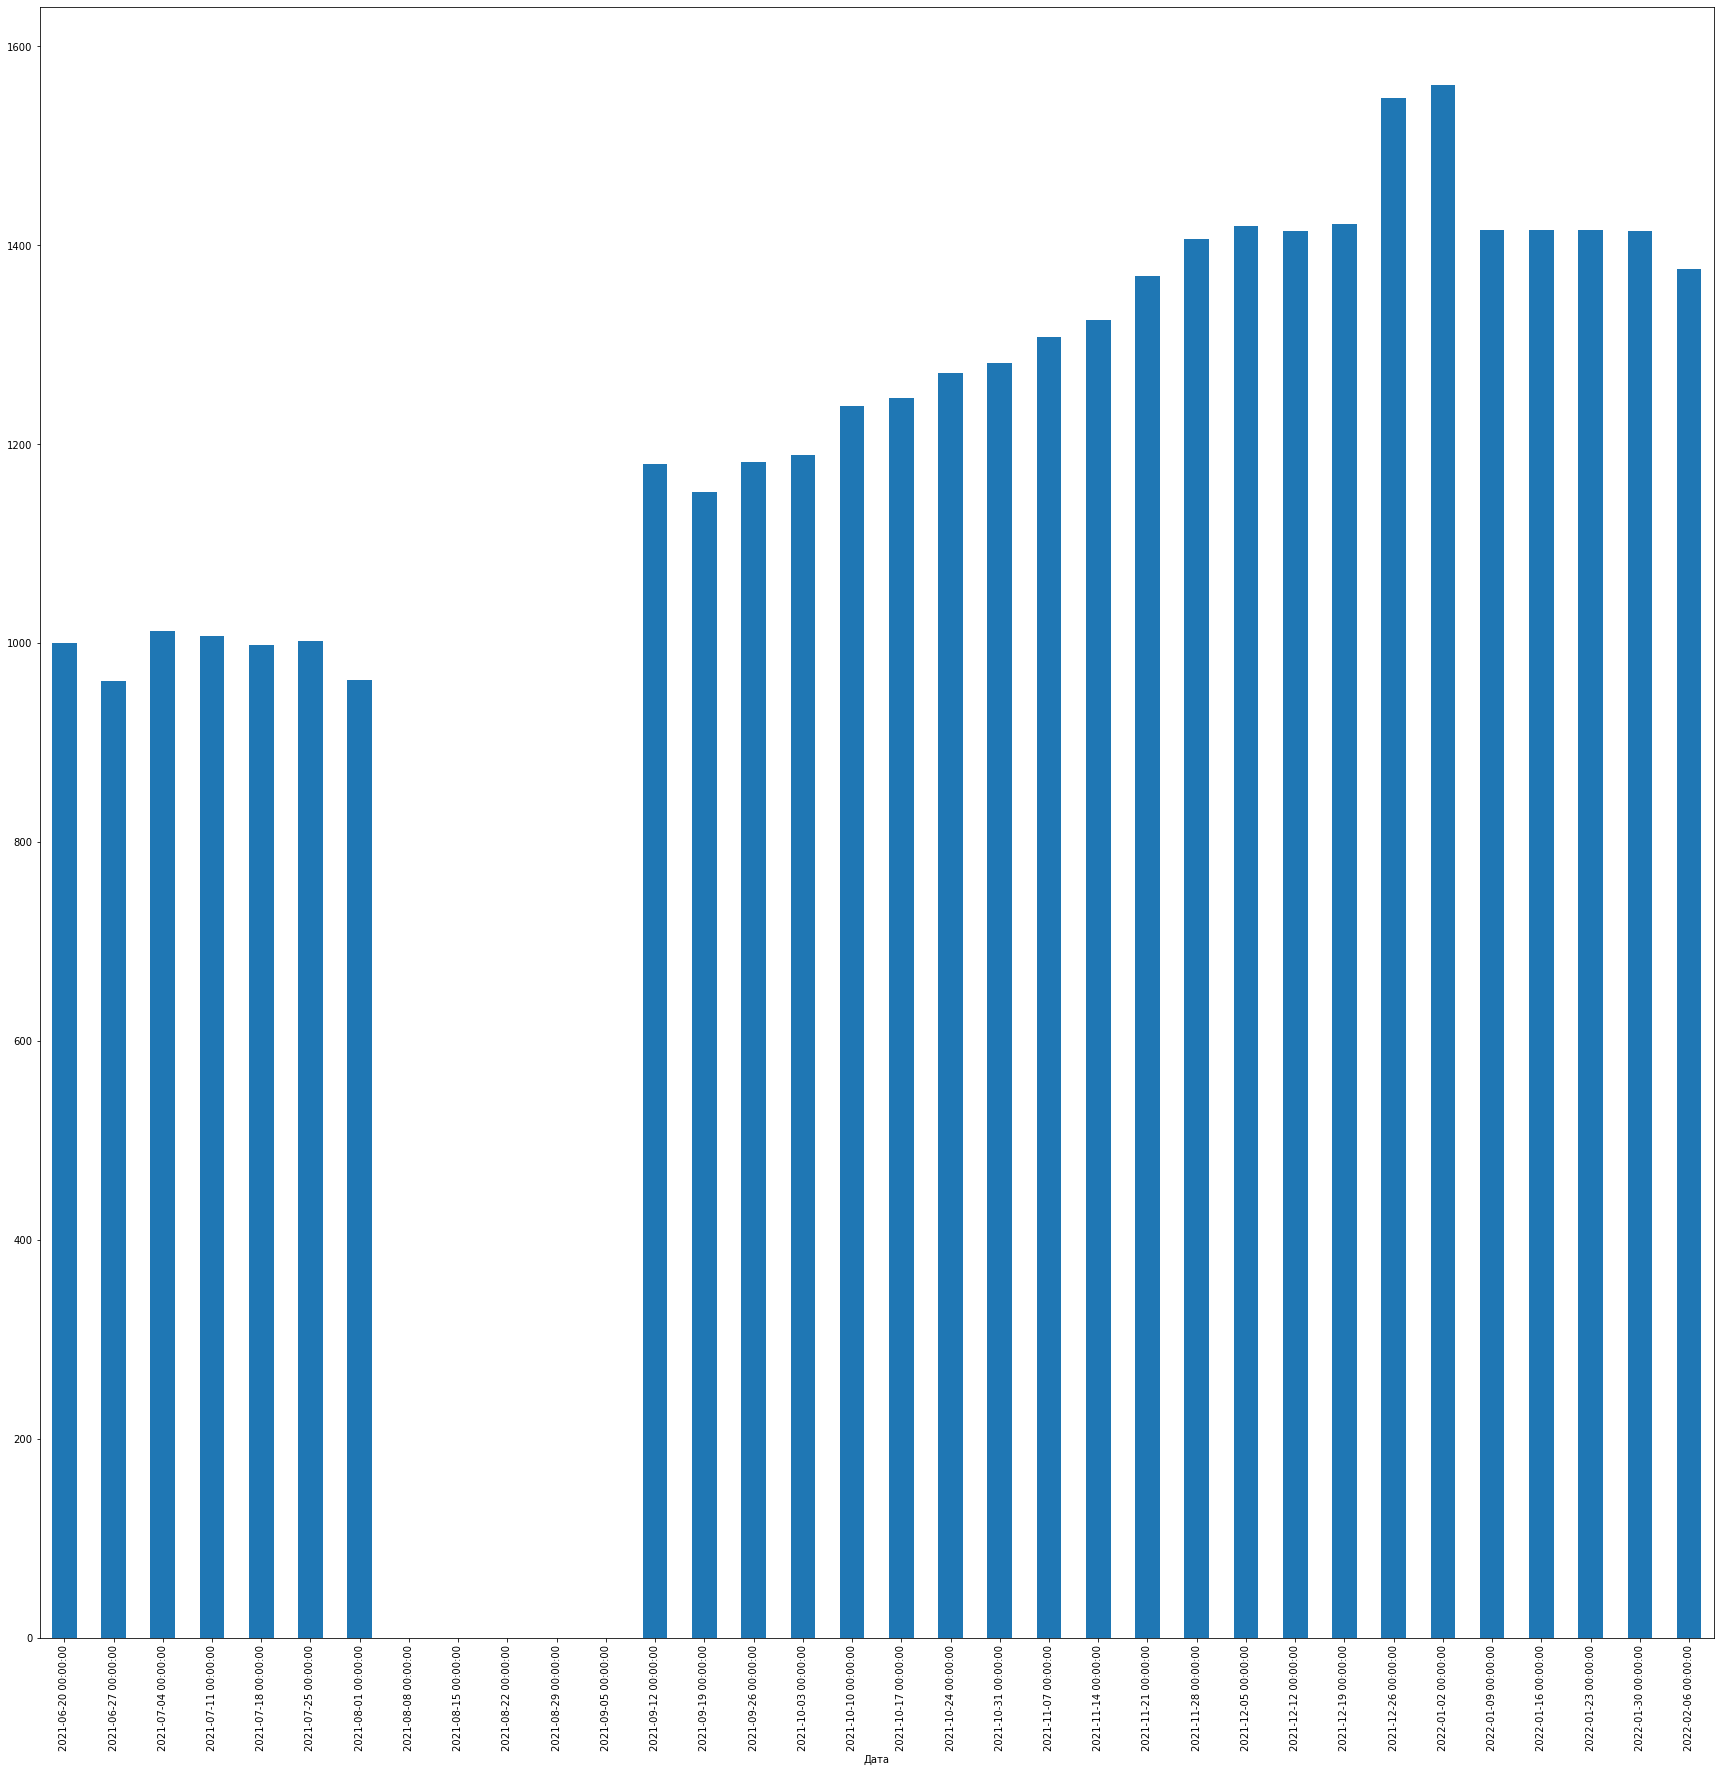

In [89]:
df.groupby([pd.Grouper(key='Дата', freq='w')])['Цена'].mean().plot(kind='bar')

Теперь давайте посмотрим как цена меняется со временем. Если брать отрезок в неделю, то видно
* постепенное повышение цены 
* пики в новогодние недели
* отсутские данных за август 

In [90]:
df.groupby(df['Дата'].dt.strftime("%H"))['Цена'].agg({'size','mean'})

,size,mean
Дата,,
00,15810,1092.352562
01,7980,1320.044110
02,4937,1406.165283
03,3060,1390.752614
04,1795,1396.972702
05,1133,1428.957635
06,819,1377.192918
07,920,1208.657609
08,2203,968.598275


По данным показательно, что
* ночью средний существенно выше
* на завтрак ниже
* количество заказов стабильно от 13 часов до 22

In [91]:
df.groupby(df['Дата'].dt.strftime("%A"))['Цена'].agg({'size','mean'})

,size,mean
Дата,,
Friday,55924,1245.320596
Monday,57287,1145.586573
Saturday,76099,1219.461622
Sunday,74749,1178.048027
Thursday,53419,1180.993448
Tuesday,55111,1135.577779
Wednesday,53605,1140.801380


Видим, что заказов больше в выходные, но средний чек выше всего в пятницу

In [92]:
op = pd.pivot_table(df[df['Цена'] != 0], values = 'Цена',
               index = 'id заказчика',
               aggfunc=(len,sum, 'mean'))
op.sort_values(by = ('len') , ascending=False)

,len,mean,sum
id заказчика,,,
293469517,59,6199.406780,365765
260062684,26,1140.038462,29641
8769566,26,3168.307692,82376
305586008,23,14.565217,335
1173942,23,1387.391304,31910
...,...,...,...
23939672,1,205.000000,205
23939848,1,450.000000,450
23940352,1,2019.000000,2019


In [93]:
op.sort_values(by = ('sum') , ascending=False)

,len,mean,sum
id заказчика,,,
293469517,59,6199.406780,365765
264337678,13,7371.538462,95830
8769566,26,3168.307692,82376
205914910,7,10017.428571,70122
477429,1,65929.000000,65929
...,...,...,...
327925132,1,1.000000,1
315035418,1,1.000000,1
314855668,1,1.000000,1


Сгруппировав все доставки по заказчикам, замечаем что наибольшое количество заказов с большим отрывом и наибольшую выручку принес один человек. Посмотрим на карте куда он заказывал

In [94]:
lat = df.loc[293469517]['location_latitude']
lon = df.loc[293469517]['location_longitude']

map = folium.Map(location=[55.751244, 37.618423], zoom_start = 10.5)

for lat, lon in zip(lat, lon):
    folium.CircleMarker(location=[lat, lon], radius = 9, color="red", fill_opacity = 0.9).add_to(map)

map

На карте отмечены разные отели, рестораны, торговые центры и объекты офисной недвижимости в пределах центрального административного округ Москвы. Предположим, что заказчик занимается организацией мероприятий и для удобства пользуется сервисом доставки еды.

In [95]:
op[op['len'] > 10].sort_values(by = ('mean') , ascending=False)

,len,mean,sum
id заказчика,,,
264337678,13,7371.538462,95830
293469517,59,6199.406780,365765
229923350,15,4119.333333,61790
236938015,11,4067.272727,44740
921614,13,3337.230769,43384
...,...,...,...
16628838,18,165.722222,2983
42492087,17,158.235294,2690
3611110,17,93.882353,1596


In [96]:
df.loc[[305586008, 307643743]]

,first_name,Дата,Цена,location_latitude,location_longitude,address_comment,user_agent,Цена1
id заказчика,,,,,,,,
305586008,Екатерина,2021-11-03 22:01:00,5,55.7088,37.3821,NaN,android (2.59.0),0-500
305586008,Миша Смирнов,2021-10-31 17:53:00,4,55.7088,37.3821,NaN,android (2.59.0),0-500
305586008,Светлана Гутякулова,2021-10-31 15:27:00,4,55.7088,37.3821,NaN,android (2.59.0),0-500
305586008,Олеся,2021-11-14 01:26:00,5,55.7088,37.3821,NaN,android (2.59.0),0-500
305586008,Юрий,2021-11-14 01:23:00,5,55.7088,37.3821,NaN,android (2.59.0),0-500
305586008,Маруся,2021-11-15 22:40:00,5,55.7088,37.3821,NaN,android (2.59.0),0-500
305586008,Vladimir,2021-10-31 14:25:00,4,55.7088,37.3821,NaN,android (2.59.0),0-500
305586008,Владислав,2021-11-11 20:07:00,4,55.7088,37.3821,NaN,android (2.59.0),0-500
305586008,Михаил,2022-01-07 21:17:00,44,55.7094,37.4423,NaN,android (2.59.0),0-500


In [97]:
lat = df.loc[[305586008, 307643743]]['location_latitude']
lon = df.loc[[305586008, 307643743]]['location_longitude']

map = folium.Map(location=[55.751244, 37.618423], zoom_start = 10.5)

for lat, lon in zip(lat, lon):
    folium.CircleMarker(location=[lat, lon], radius = 9, color="red", fill_opacity = 0.9).add_to(map)

map


Сортируя по среднему чеку и сделав фильтрацию минимум 10 заказов, я обратил внимание на наименьший средний чек, слишком он низок у последних заказчиков. Они все делаются на разные имена, но карте видим, что почти все заказы делаются в одно место за МКАДом и с одного устройства. Выгдядит это подозрительно и похоже на злоупотребление.

In [98]:
jk = pd.pivot_table(df, values = 'Цена',
               index = ['id заказчика', 'location_latitude','location_longitude'],
               aggfunc=(len,sum, 'mean')).sort_values(by = ('len') , ascending=False)
jk

,,,len,mean,sum
id заказчика,location_latitude,location_longitude,,,
307643743,55.7088,37.3821,18,33.944444,611
305586008,55.7088,37.3821,16,4.312500,69
311517903,55.7088,37.3821,9,34.000000,306
295435617,55.8275,37.4436,8,204.875000,1639
36964956,55.8477,37.3611,4,158.000000,632
...,...,...,...,...,...
8757077,55.8349,37.4893,1,308.000000,308
8756765,55.7215,37.6263,1,1037.000000,1037
8756252,55.8183,37.5021,1,2049.000000,2049


In [99]:
df.loc[(df['location_latitude'] == 55.7088) & (df['location_longitude'] == 37.3821)]

,first_name,Дата,Цена,location_latitude,location_longitude,address_comment,user_agent,Цена1
id заказчика,,,,,,,,
308506838,Мария Павлова,2021-11-06 13:30:00,34,55.7088,37.3821,NaN,ios(5.23.1),0-500
311586368,Екатерина Шинкевич,2021-11-17 06:12:00,34,55.7088,37.3821,NaN,android (2.59.0),0-500
311517903,София,2021-11-16 21:54:00,34,55.7088,37.3821,NaN,android (2.59.1),0-500
311630788,Залина,2021-11-17 12:53:00,4,55.7088,37.3821,NaN,android (2.59.0),0-500
307643743,Галина,2021-11-04 00:50:00,34,55.7088,37.3821,NaN,android (2.59.1),0-500
...,...,...,...,...,...,...,...,...
305586008,Егор,2021-10-31 16:13:00,4,55.7088,37.3821,NaN,android (2.59.0),0-500
288805711,Екатерина Смирнова,2021-11-07 12:18:00,34,55.7088,37.3821,NaN,android (2.59.0),0-500
288830081,Илья Успенский,2021-11-07 11:47:00,34,55.7088,37.3821,NaN,android (2.59.0),0-500


Всего 72 заказа с фантастически низкой ценой в разное время на этот адрес. Это точно не совпадение.

Далее давайте по именам определим пол заказчика. Для этого воспользуемся csv таблицой c 51529 именем.

In [100]:
russian_names = pd.read_csv("russian_names.csv", encoding='utf-8', sep = ';', on_bad_lines='skip')
russian_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51529 entries, 0 to 51528
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                51529 non-null  int64 
 1   Name              51529 non-null  object
 2   Sex               51529 non-null  object
 3   PeoplesCount      51529 non-null  int64 
 4   WhenPeoplesCount  51529 non-null  object
 5   Source            51529 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


<AxesSubplot:ylabel='Sex'>

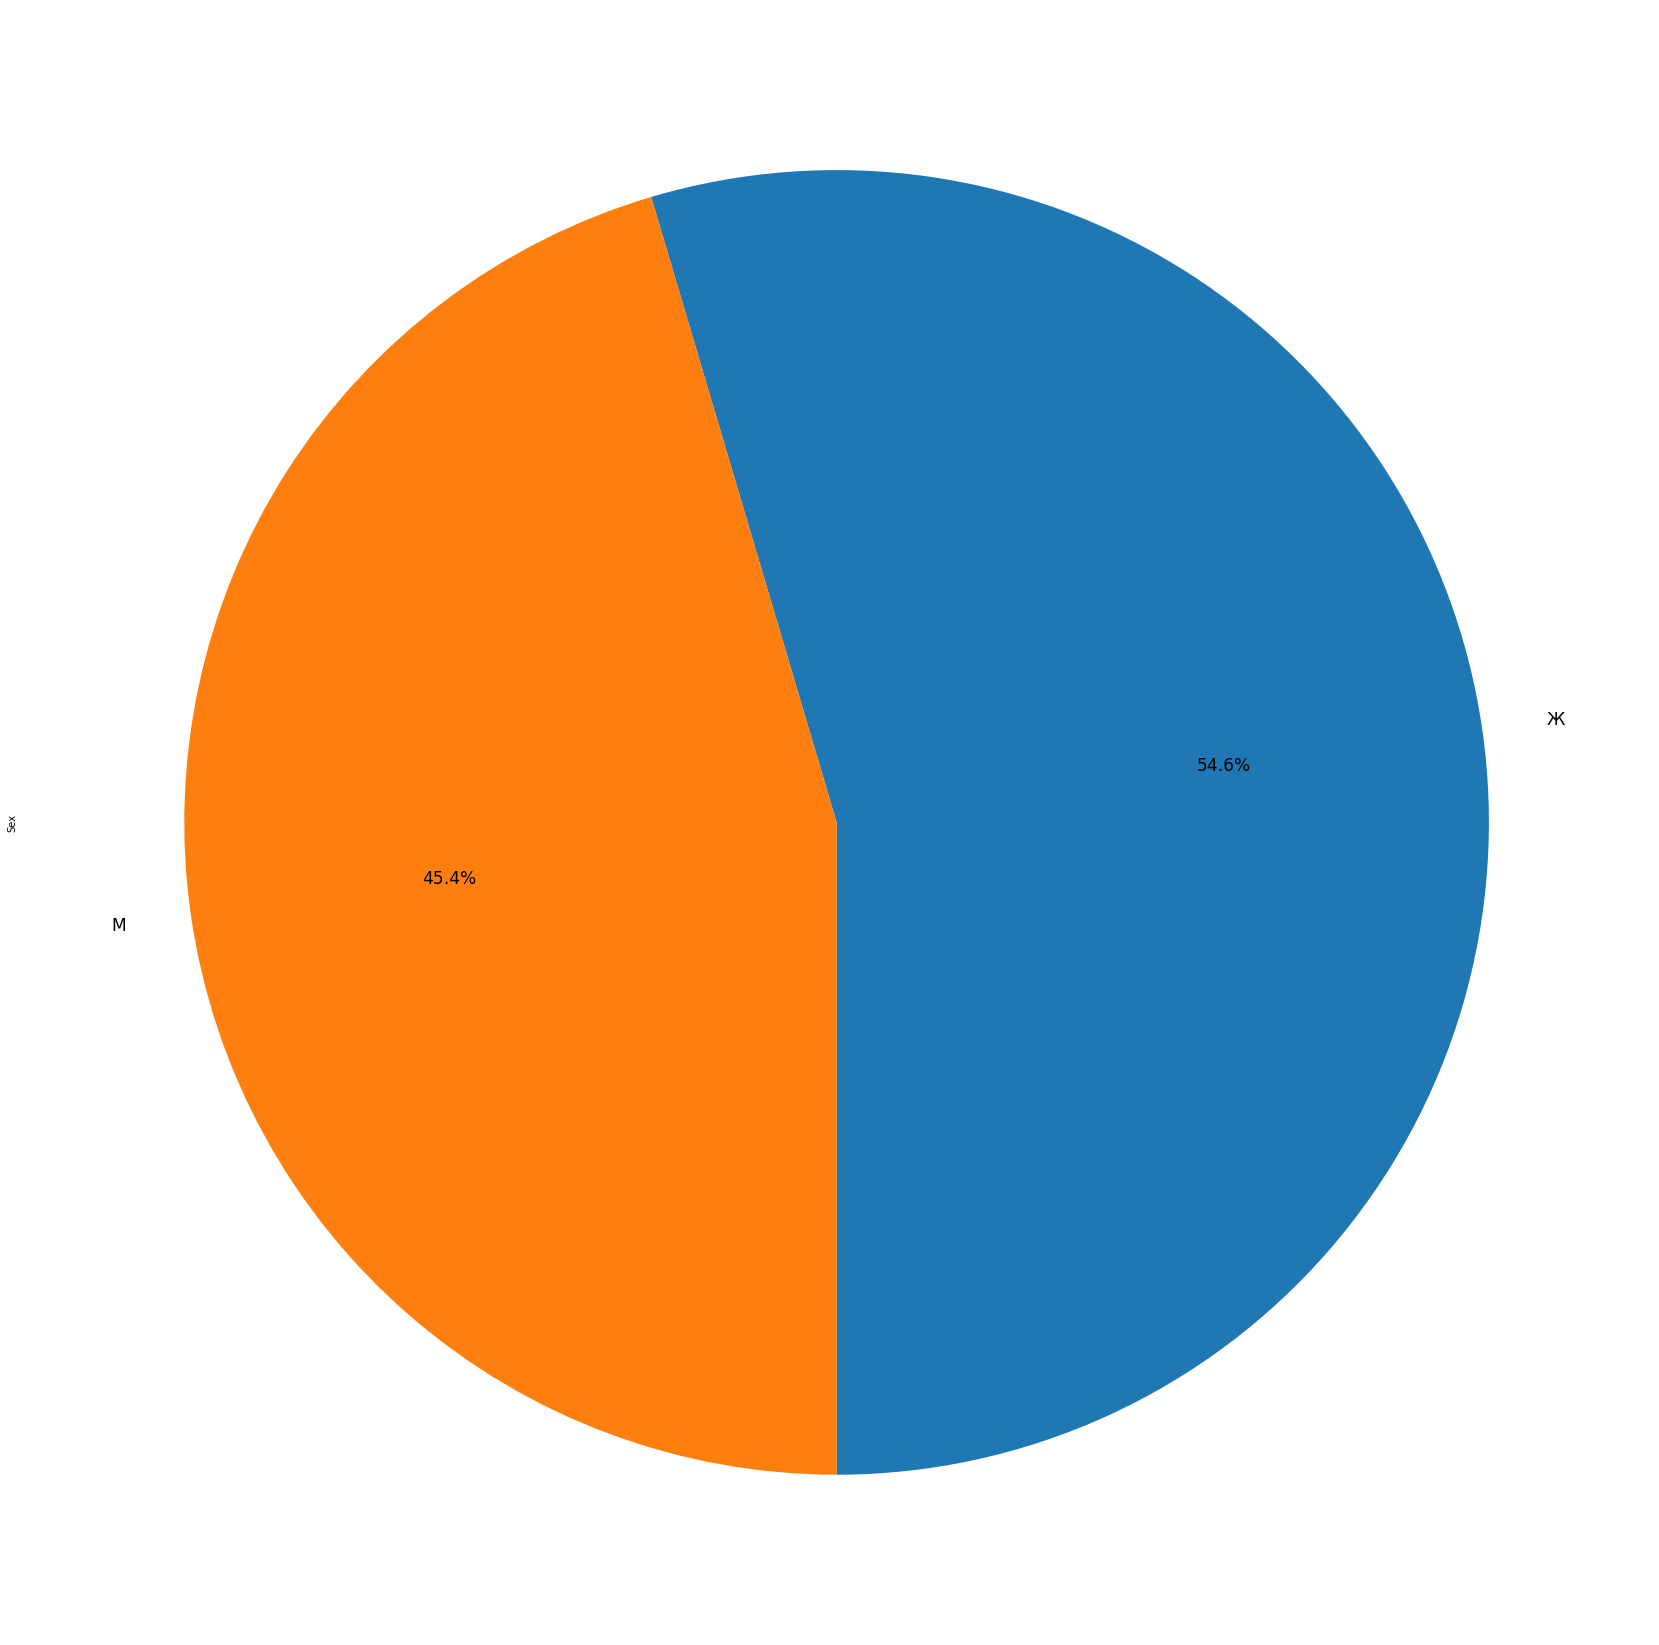

In [101]:
qz = df.merge(russian_names[['Name','Sex']], how='left',  left_on='first_name', right_on='Name')
qz['Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=270, fontsize=17)

Из найденных имен получается, что 54.6% заказов делают женщины и 45.4% мужчины. 

In [102]:
qz.pivot_table('Цена', index =[qz['Дата'].dt.strftime("%H"), 'Sex'], aggfunc=['count'])

count
           Цена
Дата Sex       
00   Ж     4057
     М     4545
01   Ж     1845
     М     2356
02   Ж     1043
     М     1611
03   Ж      602
     М     1004
04   Ж      377
     М      590
05   Ж      250
     М      346
06   Ж      175
     М      254
07   Ж      232
     М      278
08   Ж      658
     М      582
09   Ж     1833
     М     1179
10   Ж     3548
     М     2220
11   Ж     5554
     М     3484
12   Ж     7364
     М     4942
13   Ж     9177
     М     6413
14   Ж     9567
     М     7204
15   Ж     9674
     М     7417
16   Ж     9366
     М     7435
17   Ж     9228
     М     7123
18   Ж     9306
     М     7277
19   Ж     9767
     М     8173
20   Ж    10007
     М     8902
21   Ж     9605
     М     8615
22   Ж     8102
     М     7684
23   Ж     5999
     М     6298

Но если смотреть на количество заказов по часам заметно, что женщины не всегда делают большинство заказов. Ночью, начиная с 23 и до 07 мужчины заказывают больше.

In [103]:
qz.pivot_table('Цена','Sex', aggfunc=['mean'])

,mean
,Цена
Sex,
Ж,1172.500079
М,1237.791357


В среднем средний чек у мужчин выше на 65 рублей.

<AxesSubplot:ylabel='address_comment'>

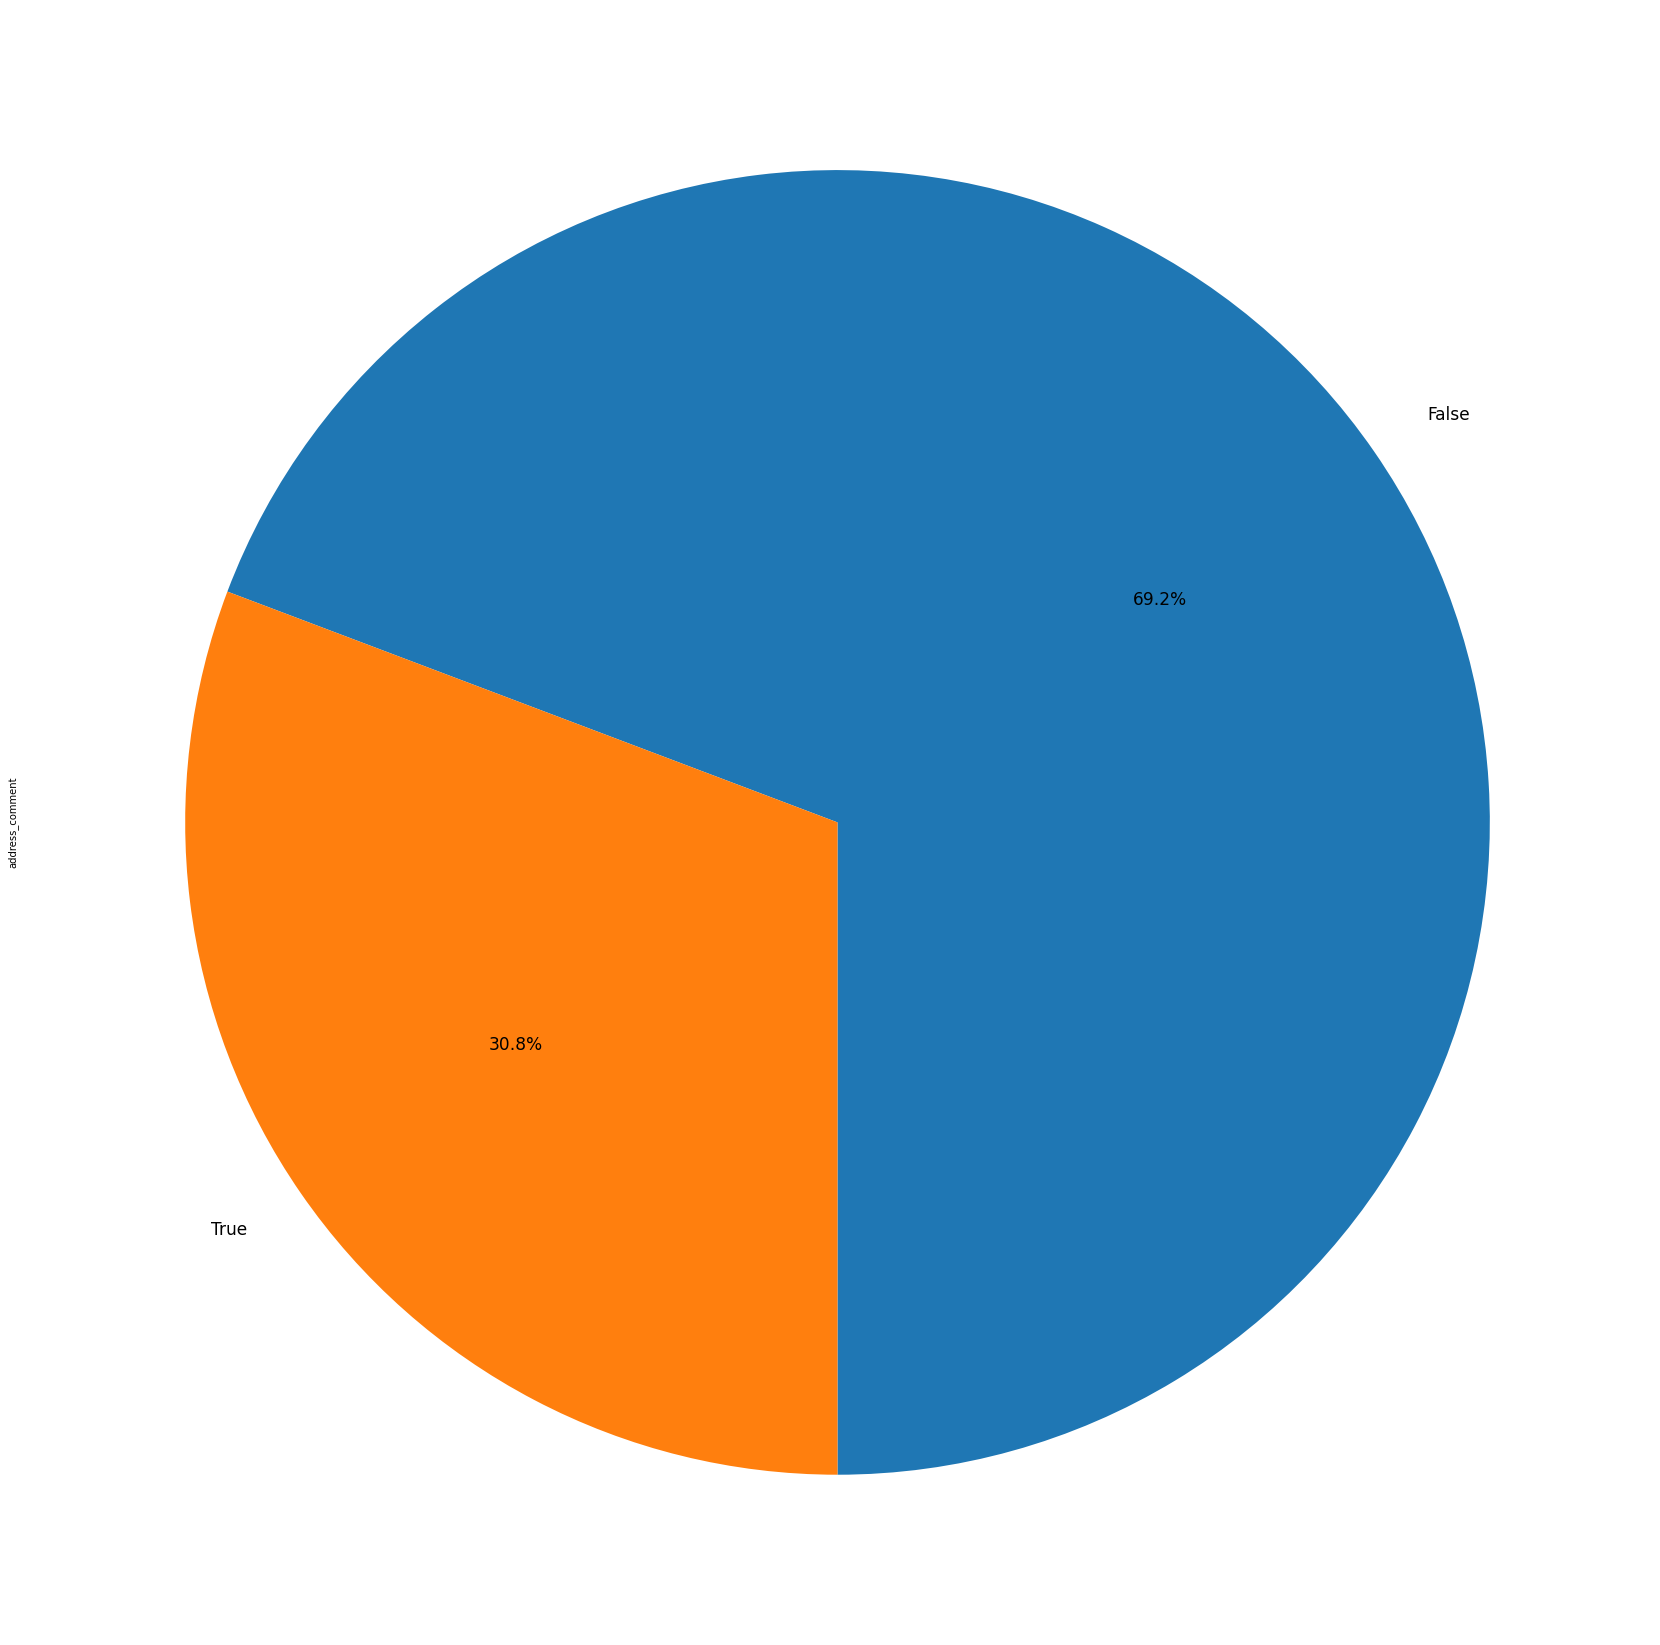

In [104]:
df['address_comment'].notnull().value_counts().plot.pie(autopct='%1.1f%%', startangle=270, fontsize=17)

In [105]:
a = df[df['address_comment'].str.contains(pat = 'звон', na=False, regex=True)].shape[0]
b = df[df['address_comment'].str.contains(pat = 'id', na=False, regex=True)].shape[0]
c = df[df['address_comment'].notnull() == True].shape[0]
b/c


0.0016859932865425694

In [106]:
de = df[df['address_comment'].notnull() == True]

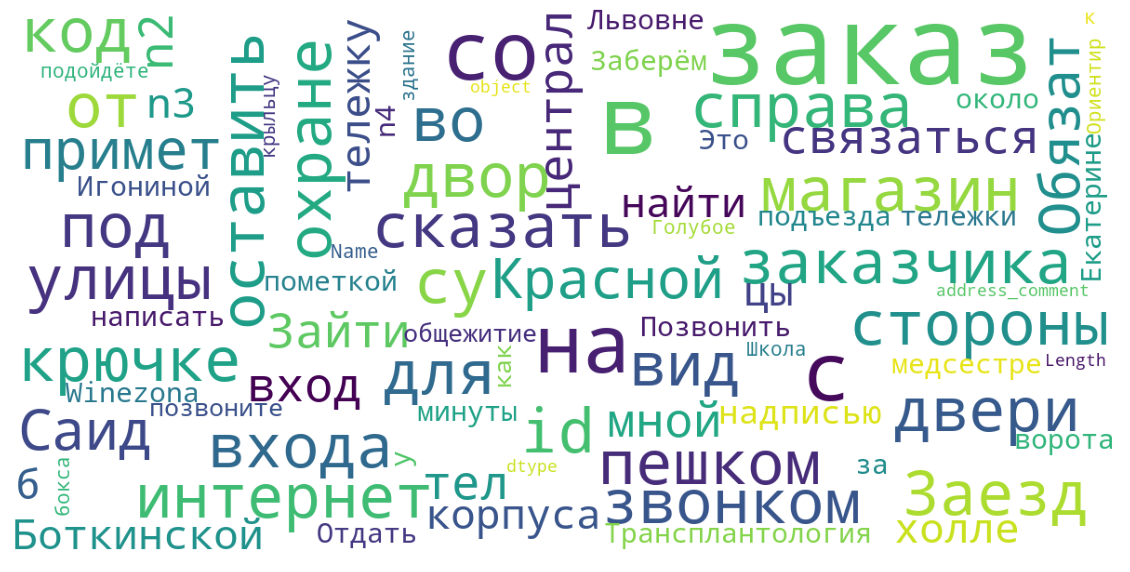

In [107]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(de, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 100,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(de))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(de['address_comment'])

Комментарии оставляет 31% людей. В облаке тэгов топ-100 самых встречаемых слов в комментариях.

In [108]:
df['user_agent'].unique()

array(['MagnitApp_Android/2.0.8',
       'Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-lavka/1.3.0.143889 YandexEatsKit/1.17.26 Lavka/Standalone',
       'ios(5.22.0)', ...,
       'Mozilla/5.0 (iPhone; CPU iPhone OS 12_5_5 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-taxi/650.24.0.190067 YandexEatsKit/1.26.0 Superapp/Eats',
       'Mozilla/5.0 (Linux; Android 11; SM-G985F Build/RP1A.200720.012; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/92.0.4515.105 Mobile Safari/537.36 com.yandex.lavka/1.5.0.1035610 Android/11 (samsung; SM-G985F) Lavka/Standalone EatsKit/3.0.0',
       'Mozilla/5.0 (Linux; Android 11; CPH2159 Build/RKQ1.200903.002; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/91.0.4472.120 Mobile Safari/537.36 yandex-taxi/4.44.2.121982 Android/11 (OPPO; CPH2159) Superapp/Eats EatsKit/3.0.0'],
      dtype=object)

Разбираясь с каких устройств делаются заказы, видим огромное количество разных версий, аппаратов, приложений. Но у приложений с Android, это слово указано. Давайте воспользуется этим и подсчитаем.

<AxesSubplot:ylabel='user_agent'>

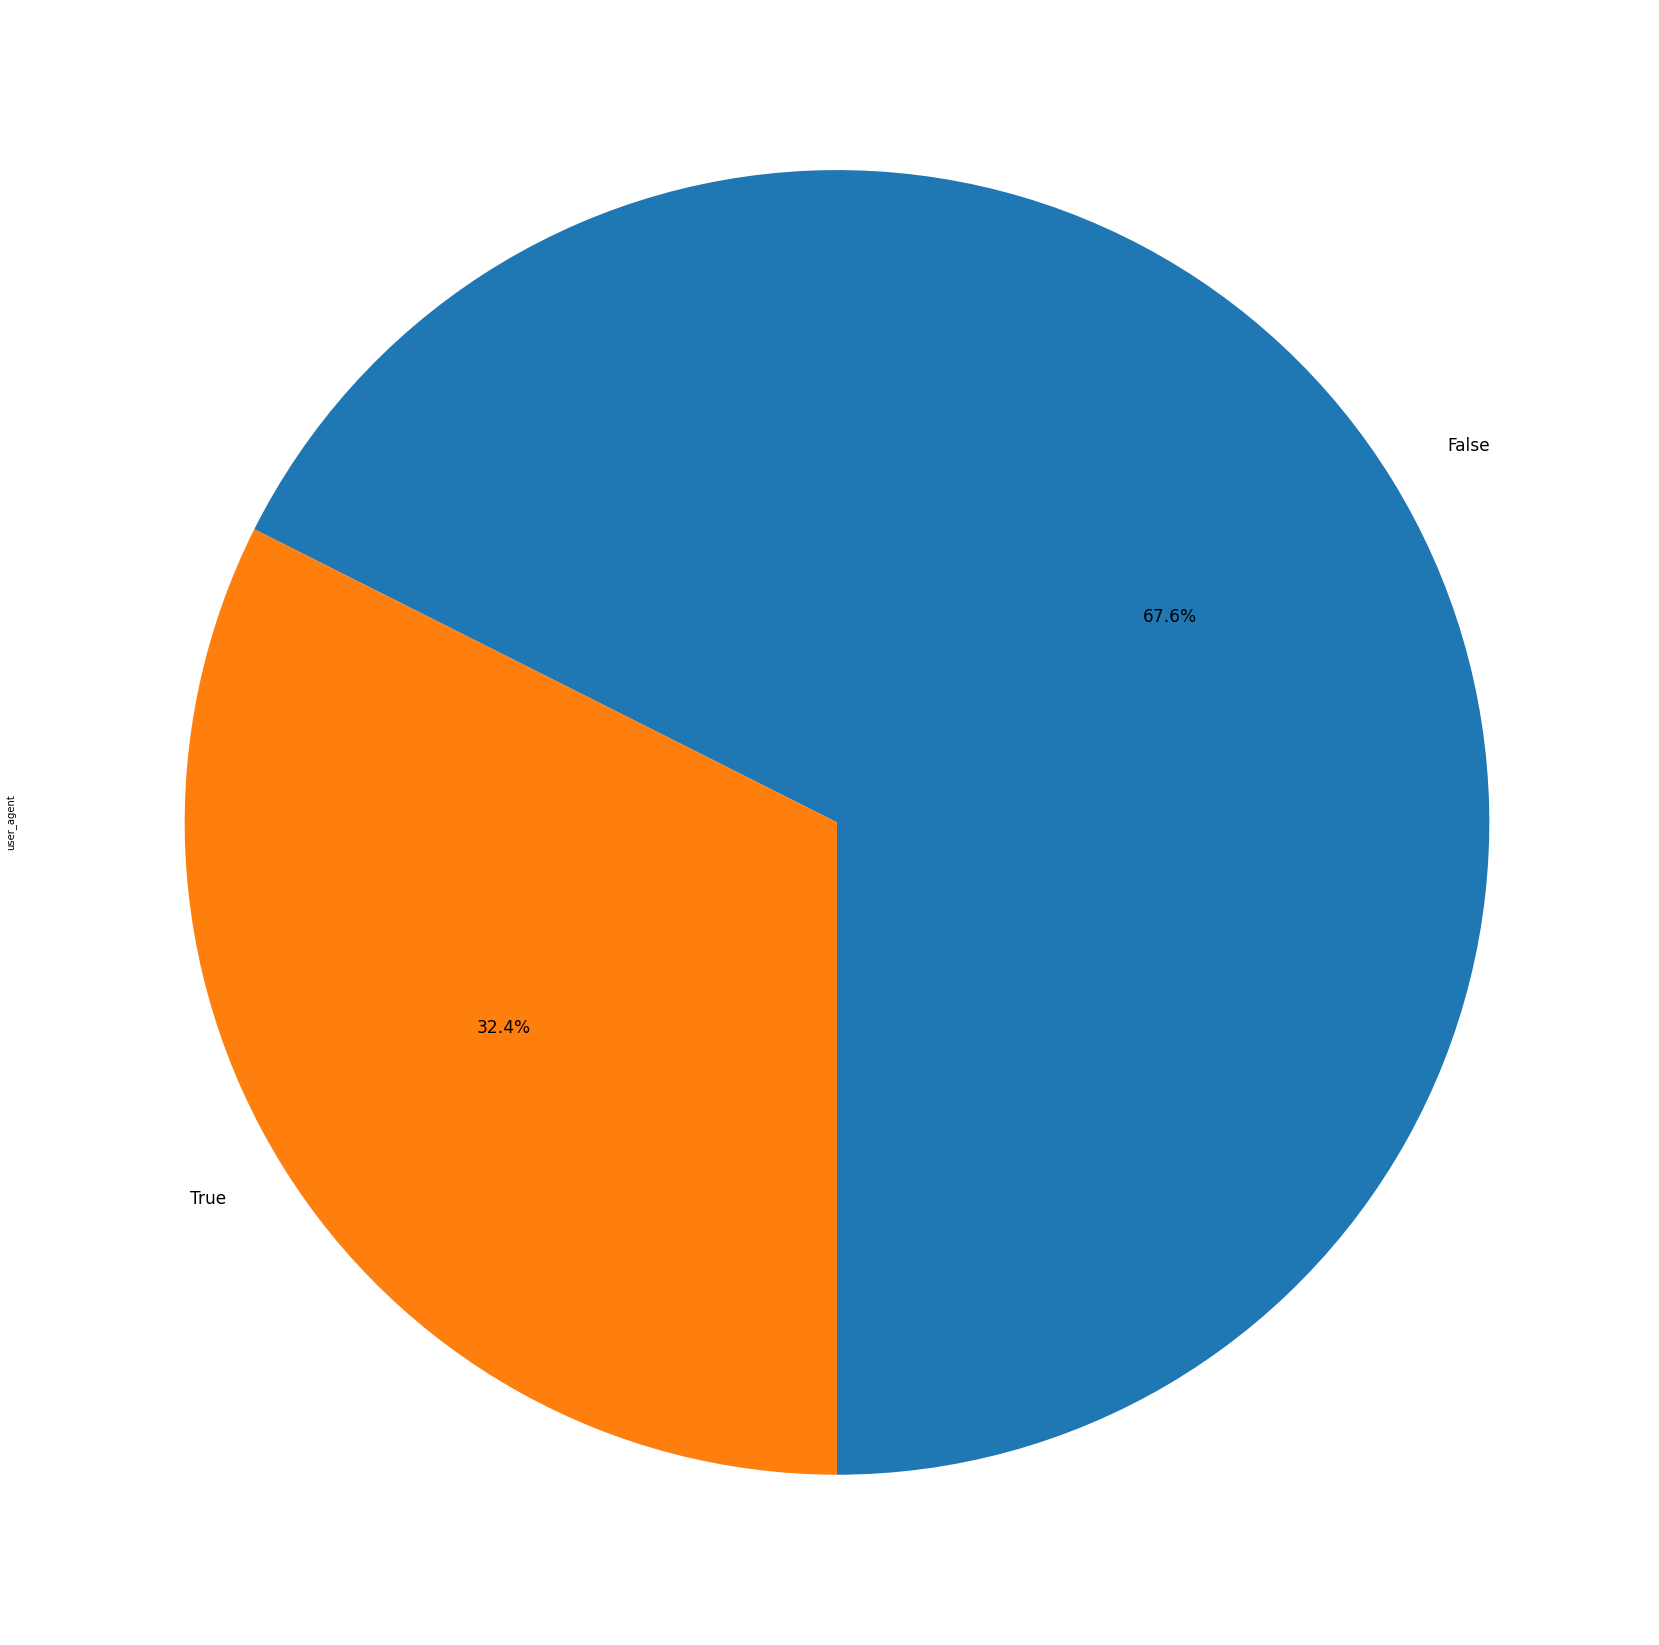

In [109]:
df['user_agent'] = df['user_agent'].str.lower()
df['user_agent'].str.contains('android', na=False, regex=True).value_counts().plot.pie(autopct='%1.1f%%', startangle=270, fontsize=17)

Только 32.4% пользуются андройдом

Вывод: 
* 

# Карта

Теперь давайте посмотрим на карте по координатам из каких районов приходят заказы.

In [110]:
dfc = df.groupby(['location_latitude', 'location_longitude']).size()
dfc = dfc.reset_index(drop=False)
dfc.columns = ['location_latitude', 'location_longitude', 'T']

In [111]:
dfc = dfc.sort_values(by='T', ascending = False)[:300]
dfc

,location_latitude,location_longitude,T
166802,55.7908,37.5232,193
120871,55.7471,37.5391,136
165260,55.7894,37.5368,134
123473,55.7496,37.5374,118
167821,55.7917,37.7486,106
...,...,...,...
152285,55.7758,37.8357,27
29396,55.6326,37.7607,27
59094,55.6775,37.6344,27
55534,55.6729,37.5176,27


Найдем на карте 300 самых популярных мест для заказа и ранжируем их. Если больше 100 заказов красный круг, если от 50 до 100 желтый, остальные зеленый.

In [112]:
lat = dfc['location_latitude']
lon = dfc['location_longitude']
elevation = dfc['T']


def color_change(elev):
    if(elev < 50):
        return('green')
    elif(50 <= elev <100):
        return('orange')
    else:
        return('red')

#Create base map
map = folium.Map(location=[55.751244, 37.618423], zoom_start = 10.5)


#Plot Markers and add to 'marker_cluster'
for lat, lon, elevation in zip(lat, lon, elevation):
    folium.CircleMarker(location=[lat, lon], radius = 9, popup=str(elevation)+" m", fill_color=color_change(elevation), color="gray", fill_opacity = 0.9).add_to(map)

#Save the map
display(map)

Видим кучность в местах центра, ЮЗАО и ЮВАО:
* в москва-сити 2 красных круга
* в районе нового арбата и киевского вокзала
* рядом с Авиапарком и на ул. Беговой
* Савеловский сити
* Измайлово парк
* Юго-западная

Практически все места это офисы.

In [113]:
day_df = df[((df['Дата'].dt.hour>=10) & (df['Дата'].dt.hour<21)) & ((df['Дата'].dt.strftime("%A") != 'Saturday') & (df['Дата'].dt.strftime("%A") != 'Sunday'))]
day_df = day_df.groupby(['location_latitude', 
                         'location_longitude'])['Цена'].agg(['size','mean']).sort_values(by = 'size', ascending = False).reset_index(drop=False)[:300]

In [114]:
lat = day_df['location_latitude']
lon = day_df['location_longitude']
elevation = day_df['size']


def color_change(elev):
    if(elev < 71):
        return('green')
    elif(71 <= elev <45):
        return('orange')
    else:
        return('red')

#Create base map
map = folium.Map(location=[55.751244, 37.618423], zoom_start = 10.5)


#Plot Markers and add to 'marker_cluster'
for lat, lon, elevation in zip(lat, lon, elevation):
    folium.CircleMarker(location=[lat, lon], radius = 9, popup=str(elevation)+" m", fill_color=color_change(elevation), color="gray", fill_opacity = 0.9).add_to(map)

#Save the map
map

После фильтрации по рабочим часам картина практичести не изменилась: те же группы точек, что и без фильтра.

In [115]:
nowork = df[((df['Дата'].dt.hour<10) | (df['Дата'].dt.hour>=21)) & ((df['Дата'].dt.strftime("%A") == 'Saturday') | (df['Дата'].dt.strftime("%A") == 'Sunday'))]
nowork = nowork.groupby(['location_latitude', 
                         'location_longitude'])['Цена'].agg(['size','mean']).sort_values(by = 'size', ascending = False).reset_index(drop=False)[:300]
lat = nowork['location_latitude']
lon = nowork['location_longitude']
elevation = nowork['size']


def color_change(elev):
    if(elev < 71):
        return('green')
    elif(71 <= elev <45):
        return('orange')
    else:
        return('red')

#Create base map
map = folium.Map(location=[55.751244, 37.618423], zoom_start = 10.5)


#Plot Markers and add to 'marker_cluster'
for lat, lon, elevation in zip(lat, lon, elevation):
    folium.CircleMarker(location=[lat, lon], radius = 9, popup=str(elevation)+" m", fill_color=color_change(elevation), color="gray", fill_opacity = 0.9).add_to(map)

#Save the map
map

Если поставить нерабочие часы и выходные ситуация меняется:
* произошло рассредоточение точек по Москве
* меньше точек в центре и больше в спальных районах (очень заметно в ЮЗАО)

In [119]:
from ipywidgets.embed import embed_minimal_html
embed_minimal_html('map.html', views=[m])

NameError: name 'm' is not defined

In [ ]:
from selenium import webdriver
driver = webdriver.Firefox(executable_path=r'your\path\geckodriver.exe')
driver.get('http://inventwithpython.com')

In [ ]:
df['Цена'].sum()

In [ ]:
hgg = beznull.sort_values(by='created_at', ascending=True)[:300]
hgg

In [ ]:
hgg.plot(kind='bar', x="created_at", y="amount_charged", figsize=(15, 10))

In [ ]:
ryy.plot(kind='bar', y="amount_charged", figsize=(15, 10))

In [ ]:
beznull.dtypes

In [ ]:
df

In [ ]:
beznull['amount_charged12'].value_counts()

In [ ]:
beznull['amount_charged12'].value_counts().plot(kind='bar', y="amount_charged12", figsize=(15, 10))

In [ ]:
rff = pd.cut(beznull['amount_charged'],
       bins=np.linspace(0, 3000, 101)).value_counts()
rff.dtypes

In [ ]:
rff.value_counts().plot(kind='bar', y="amount_charged12", figsize=(15, 10))

In [ ]:
beznull['amount_charged'] = round(beznull['amount_charged'], -2)

In [ ]:
edd = beznull.groupby(['amount_charged']).size().reset_index(name='count')
edd = edd[(edd['count'] >= 20)]

In [ ]:
edd.plot(kind='bar', y="count", figsize=(15, 10))


In [ ]:
import fiona

In [ ]:
gdalinfo --version